In [2]:
import numpy as np
import pandas as pd

In [3]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error
# lets take some regression models
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [4]:
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
data = pd.read_csv(r"C:\Users\user\OneDrive\Υπολογιστής\corona.csv")                       
df = data.copy()

In [6]:
df.head()

,Country,Confirmed,Deaths,Recovered
0,Afghanistan,537,21,8
1,Algeria,19,0,0
2,Andorra,1,0,0
3,Argentina,12,1,0
4,Armenia,1,0,0


In [7]:
df = df[['Country', 'Confirmed', 'Deaths', 'Recovered']]
# things we need now
df.head(10)

,Country,Confirmed,Deaths,Recovered
0,Afghanistan,537,21,8
1,Algeria,19,0,0
2,Andorra,1,0,0
3,Argentina,12,1,0
4,Armenia,1,0,0
5,Australia,76,0,21
6,Austria,104,0,0
7,Azerbaijan,9,0,0
8,Bahrain,85,0,4
9,Bangladesh,3,0,0


In [8]:
#Death rates and recovery rates
confirmed_case = list(df.Confirmed.iloc[0: ])
death_case = list(df.Deaths.iloc[0: ])
recovered_case = list(df.Recovered.iloc[0: ])

Recovery_rate = list()
Death_rate = list()

for i in range(0, len(confirmed_case)):
    if death_case[i] != 0:
        Death_rate.append(death_case[i] / confirmed_case[i] * 100)
    else: Death_rate.append(0)

    if recovered_case[i] != 0:
        Recovery_rate.append(recovered_case[i] / confirmed_case[i] * 100)
    else: Recovery_rate.append(0)

print("DEATH RATES:", Death_rate)
print('\n')
print("RECOVERY RATES:", Recovery_rate)

DEATH RATES: [3.910614525139665, 0, 0, 8.333333333333332, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.0408163265306123, 0, 0, 0, 1.6873889875666075, 0, 0, 0, 0, 0, 2.631578947368421, 0, 0, 0, 0, 2.954614681693573, 10.0, 0, 0, 4.96271186440678, 1.1952191235059761, 0, 0, 0, 0, 0, 0, 0, 0, 3.8377179395035874, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.1320754716981132, 0, 0, 0, 0, 0, 0.8620689655172413, 0, 0, 0, 0, 10.0, 0, 0, 0, 0, 0, 0, 0, 2.7777777777777777, 0, 0, 0, 0, 0, 0, 0, 0.6836204539239814, 2.526002971768202, 0, 0, 0.5934718100890208, 2.2222222222222223, 2.0, 0, 0, 1.098901098901099, 0, 0, 1.1111111111111112, 0, 0]


RECOVERY RATES: [1.48975791433892, 0, 0, 0, 0, 27.631578947368425, 0, 0, 4.705882352941177, 0, 0, 0.5, 0, 0, 0, 0, 50.0, 0, 12.5, 0, 0, 0, 0, 0, 2.857142857142857, 0, 0, 2.0408163265306123, 0, 0, 4.3478260869565215, 1.0657193605683837, 0, 0, 1.7307692307692308, 0, 0, 50.877192982456144, 0, 0, 7.6923076923076925, 0, 32.5007614986293, 0, 0, 5.12820512820

In [10]:
df['DeathRate'] = Death_rate
df['RecoveryRate'] = Recovery_rate

df.head(20)

,Country,Confirmed,Deaths,Recovered,DeathRate,RecoveryRate
0,Afghanistan,537,21,8,3.910615,1.489758
1,Algeria,19,0,0,0.000000,0.000000
2,Andorra,1,0,0,0.000000,0.000000
3,Argentina,12,1,0,8.333333,0.000000
4,Armenia,1,0,0,0.000000,0.000000
5,Australia,76,0,21,0.000000,27.631579
6,Austria,104,0,0,0.000000,0.000000
7,Azerbaijan,9,0,0,0.000000,0.000000
8,Bahrain,85,0,4,0.000000,4.705882
9,Bangladesh,3,0,0,0.000000,0.000000


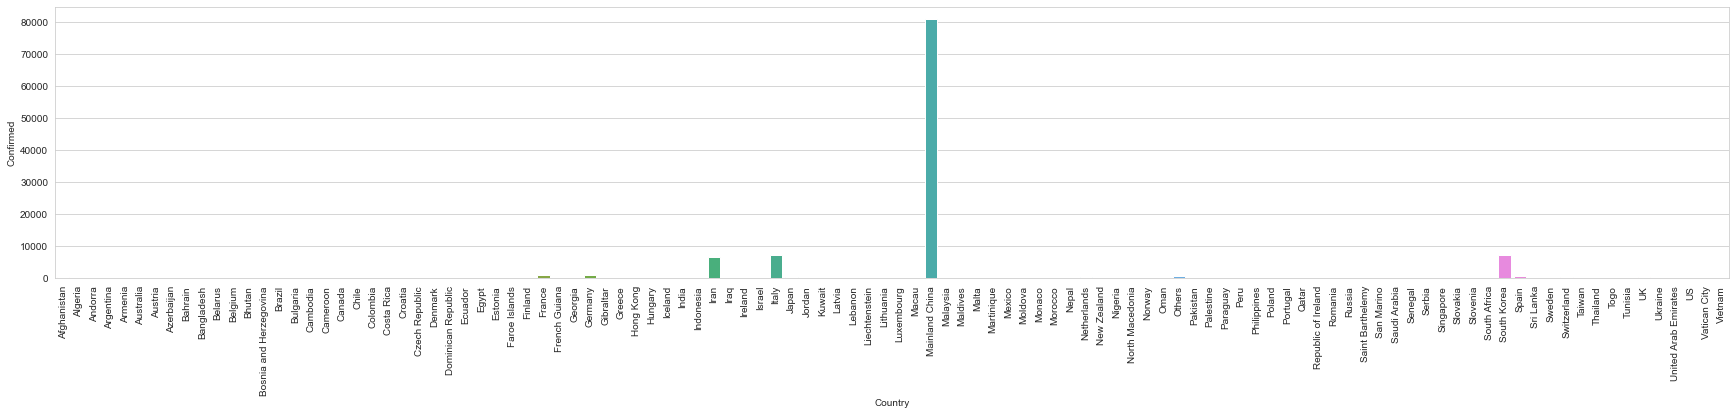

In [11]:
#plot confirmed cases in each country
sb.set_style('whitegrid')
plt.figure(figsize=(30,5))
sb.barplot(x=df['Country'], y=df['Confirmed'])
plt.xticks(rotation=90)
plt.show()

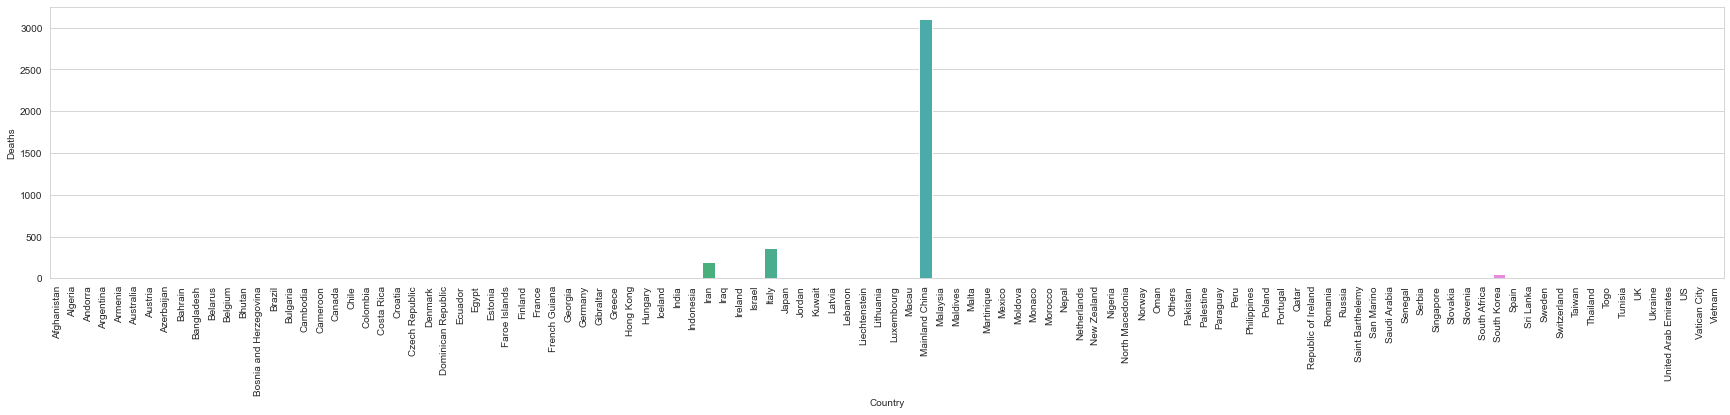

In [12]:
#plot deaths in each country
sb.set_style('whitegrid')
plt.figure(figsize=(30,5))
sb.barplot(x=df['Country'], y=df['Deaths'])
plt.xticks(rotation=90)
plt.show()

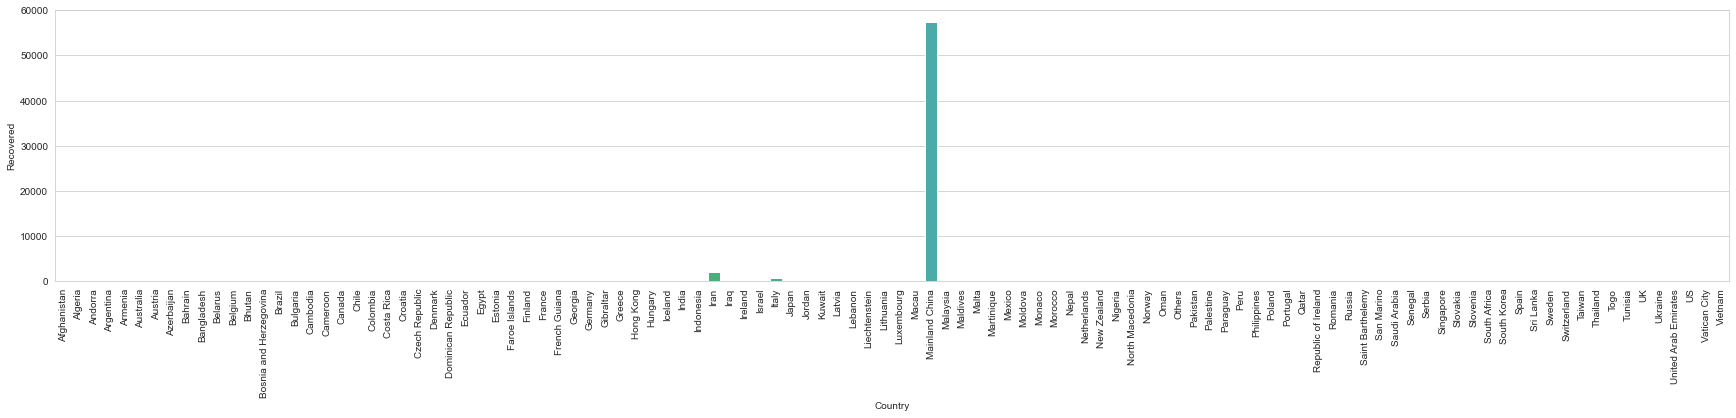

In [13]:
#plot recovered cases in eah country
sb.set_style('whitegrid')
plt.figure(figsize=(30,5))
sb.barplot(x=df['Country'], y=df['Recovered'])
plt.xticks(rotation=90)
plt.show()

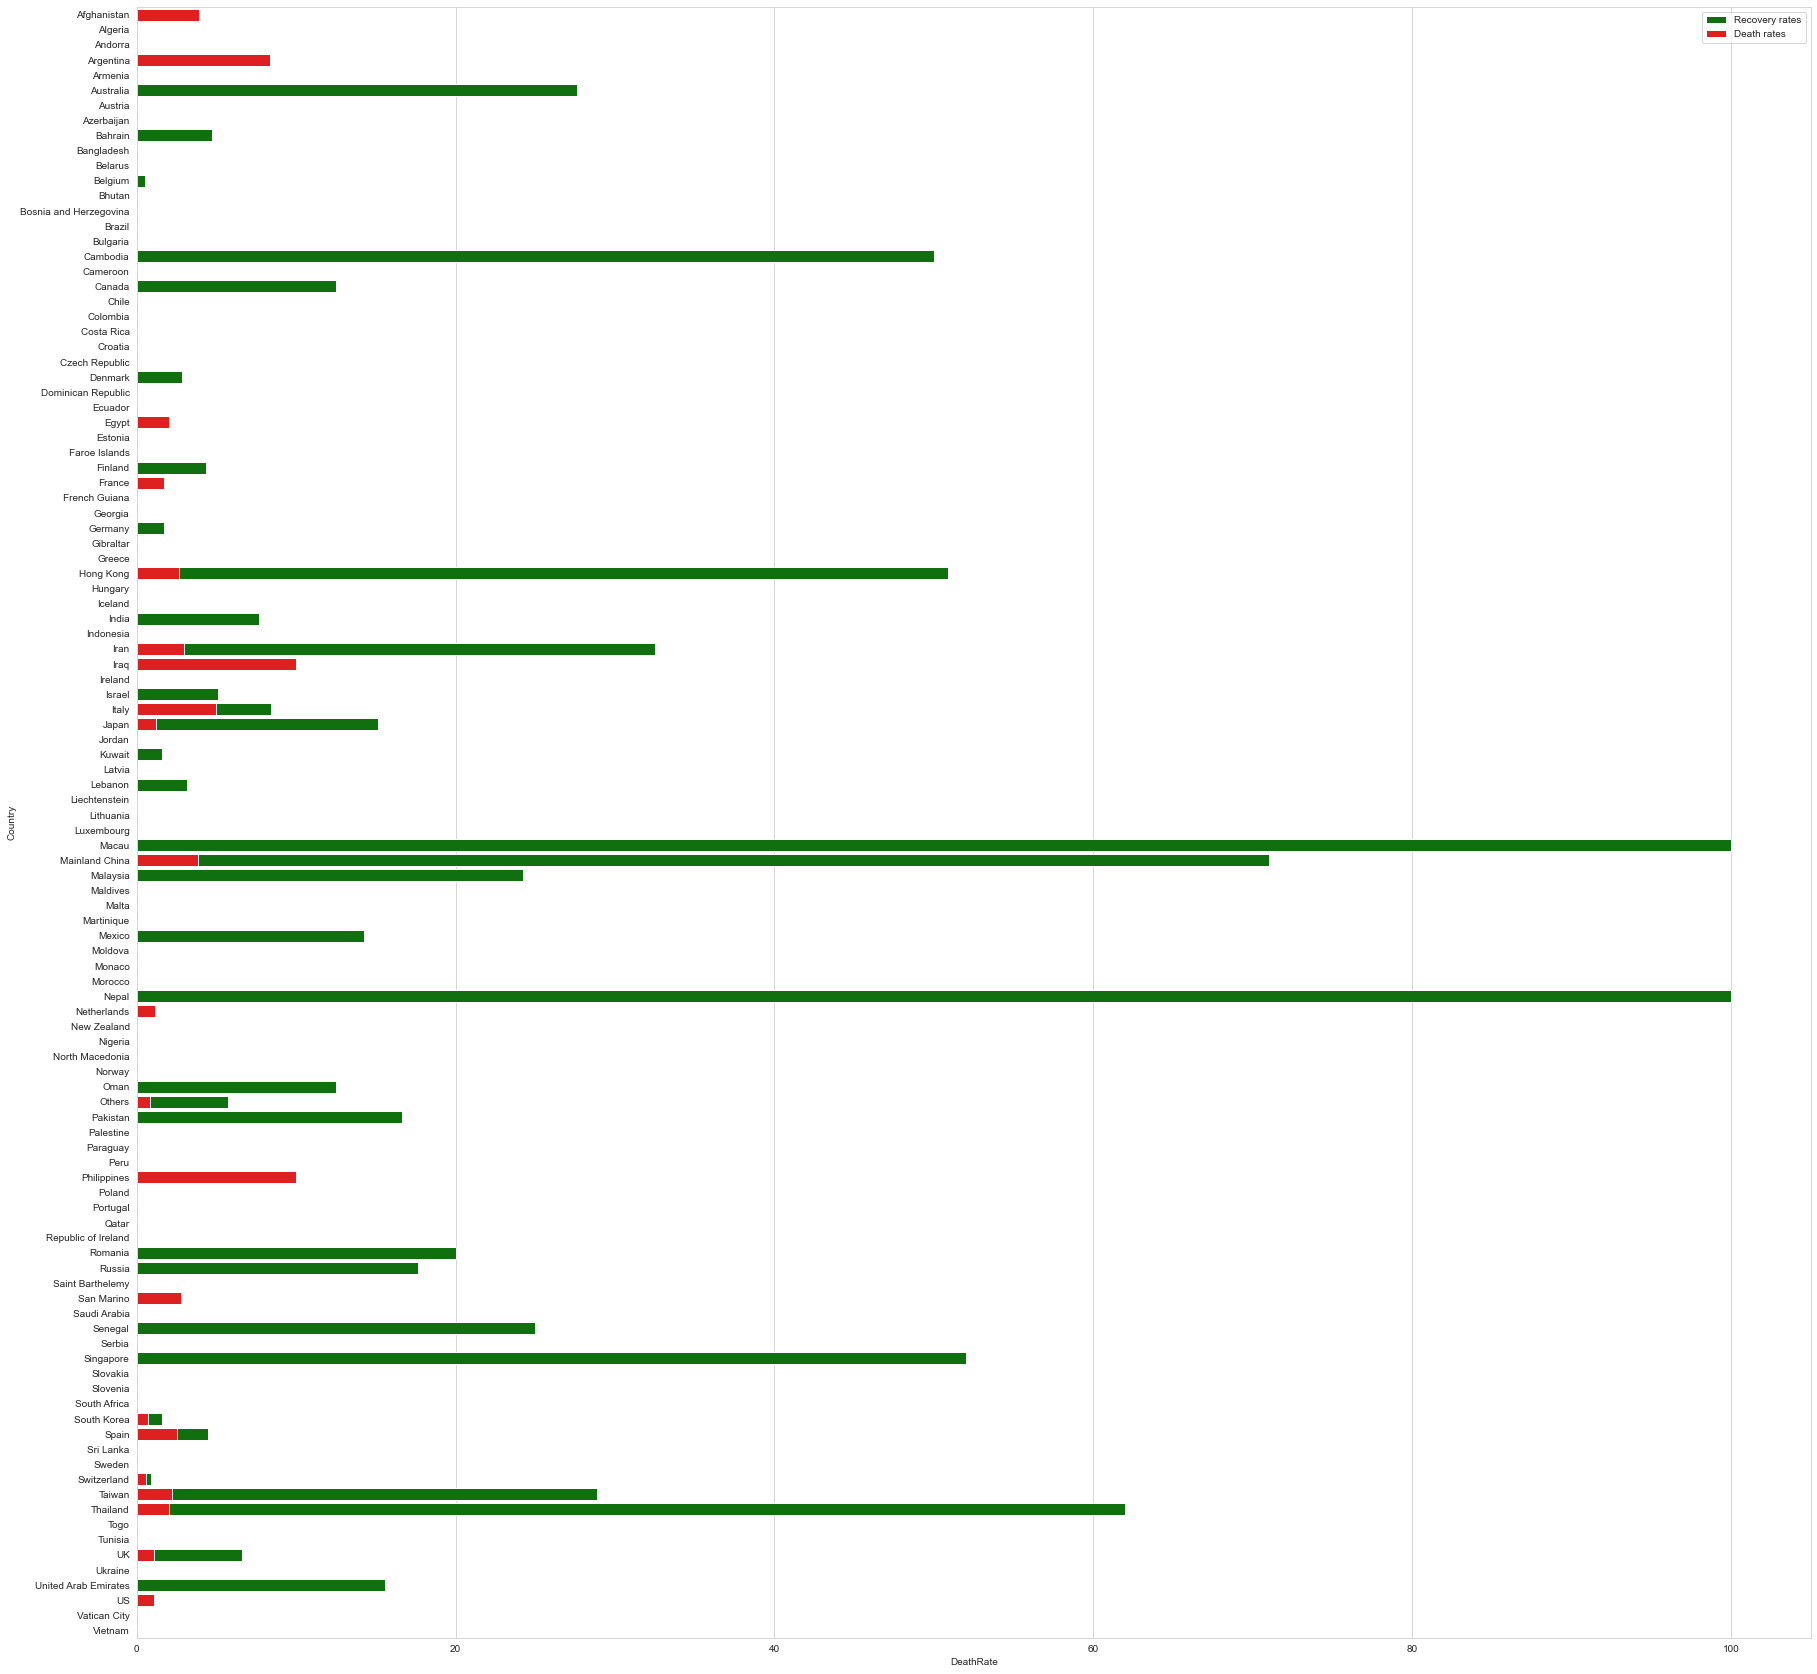

In [14]:
# lets make a bar plot to visualize the death rate and recovery rate
plt.figure(figsize=(30,30))
sb.barplot(y='Country', x= 'RecoveryRate', data = df, color='g', label='Recovery rates')
sb.barplot(y='Country', x= 'DeathRate', data = df, color='r',label='Death rates')
plt.legend()
plt.show()

In [15]:
data = pd.read_csv(r"C:\Users\user\OneDrive\Υπολογιστής\temperatures.csv")                       
temp_df = data.copy()

In [16]:
temp_df.head(10)

,Country,Cases,Deaths,Recovered,Temperature(C)
0,Afghanistan,537,21,8,12.60
1,Algeria,19,0,0,22.50
2,Andorra,1,0,0,7.60
3,Argentina,12,1,0,14.80
4,Armenia,1,0,0,7.15
5,Australia,76,0,21,21.65
6,Austria,104,0,0,6.35
7,Azerbaijan,9,0,0,11.95
8,Bahrain,85,0,4,27.15
9,Bangladesh,18,1,1,25.00


In [18]:
# lets remove C by creating a new feature in data frame
temp_df['Temperature'] = temp_df['Temperature(C)']

# lets group the up based on Cases and Deathes
new_temp = temp_df.groupby(['Cases', 'Deaths']).Temperature.mean() # i'm taking a average value of temperature of cases
# series to data frame
new_temp_df = new_temp.to_frame()
new_temp_df = new_temp_df.reset_index()

# making a scatter plot axis for some limited values
# limiting this just to make it more visible 

X = new_temp_df.head(55).Cases
Y = new_temp_df.head(55).Temperature
new_temp_df.head(10) # my temperature base data frame

,Cases,Deaths,Temperature
0,0,0,24.450000
1,1,0,14.835294
2,2,0,18.660000
3,3,0,12.008333
4,4,0,22.016667
5,5,0,19.966667
6,6,0,17.950000
7,7,0,15.375000
8,8,0,8.450000
9,9,0,11.950000


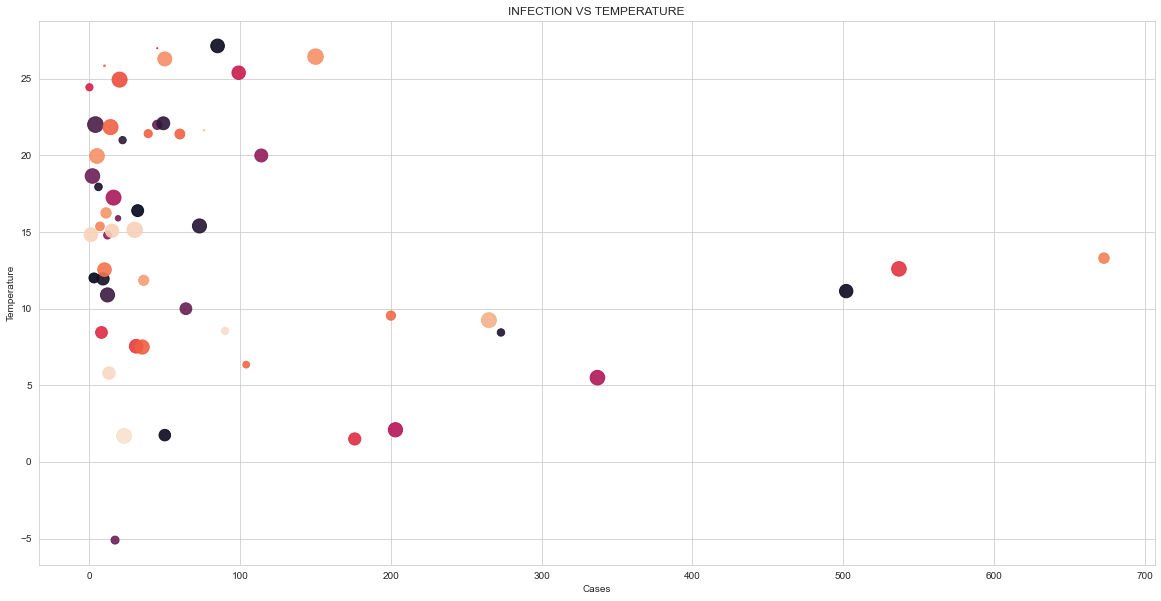

In [19]:
N = 55
colors = np.random.rand(N)
area = (50 * np.random.rand(N))*5  # 0 to 15 point radii
plt.figure(figsize=(20,10))
plt.scatter(X, Y, s=area, c=colors, alpha=0.9)
plt.title('INFECTION VS TEMPERATURE')
plt.xlabel('Cases')
plt.ylabel('Temperature')
plt.show()